# Gaussian Mixture Models

Gaussains Mixture Model (GMM) is unsupervised clustering which is also known as "EM Clustering". The idea of GMM is very simple: for a given dataset, each point is generated by linear combination of multiple Gaussians.


## What is a Gaussian?

It is probability ~~density~~ function: It returns the probability of that value occur. Also, as known as Normal distribution.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/450px-Empirical_Rule.PNG" alt="drawing" width="350"/>


<img src="https://thecuriousastronomer.files.wordpress.com/2014/06/1000px-normal_distribution_pdf-svg.png" width="350"/>


<img src="http://i.imgur.com/iDNiL13.jpg" width="200"/>


The formula for a Gaussian distribution - This is also called the probability density function (**PDF**). It's a function of a continuous random variable and gives the probability that value of the random variable lies $x$ and $x+dx$.

For *d dimension* the Gaussian is defined as (multivariate Gaussian distribution)


$ 
N(x| \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}\sqrt{\Sigma}} \exp{\left[\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu)^T\right]}
$

Where:  

* $x = (x_1, x_2, ..., x_d)$,  
* $\mu = (\mu_1, \mu_2, ..., \mu_d)$ is the mean and,   
* $\Sigma$ is the covariance matrix  

Covariance is a measure of how changes in one variable are associated with changes in a second variable (**multicollinearity**). Specifically, covariance measures the degree to which two variables are linearly associated.

PS: For more about covariance matrix http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

Below is an example of bi-dimensional covariance matrix.

<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2(x_1) & cov(x_2,x_1) \\
 cov(x_1,x_2) &  \sigma^2(x_2)
\end{bmatrix}
$
</center>

$cov(x,y)=\frac{\sum_{i=1}^{N}(x_{i})(y_{i})}{N-1}$

**Note assume the $x$ and $y$ are zero mean**

The geometric interpretation can be seen in the graph below. It is just rotation and stretch in the main axes and the Gaussian contours look likes ellipsoids.

<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2(x_1) & cov(x_2,x_1) \\
 cov(x_1,x_2) &  \sigma^2(x_2)
\end{bmatrix}
$
</center>

<img src="./images/covariance_full.png" width="300"/>

It is optional (it is simplification to work with only the diagonal elements of the covariance matrix), despite the correlation between the dimensions.

<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2(x_1) & 0.0 \\
 0.0 &  \sigma^2(x_2)
\end{bmatrix}
$
</center>

<img src="./images/covariance_diag.png" width="300"/>


<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2 & 0.0 \\
 0.0 &  \sigma^2
\end{bmatrix}
$
</center>

<img src="./images/covariance_spherical.png" width="300"/>


### What are example of data you can model with a normal distribution?

<br>

- Physical quantities (height, weight, length, ...)  
- Test scores  
- Salary  
- Anything that is sum of many independent processes. This is the heart of the Central Limit Theorem (CLT).  


Also, many measurements are almost normal and it is possible to convert these measurements to normal distribution by applying transformation in the data.


### Not Everything is Normal


<img src="images/abnormal.png" width="400"/>

Sometimes You Have 2 Gaussians

<img src="images/2_gaus.png" width="350"/>

Sometimes you need even more


## What is a Gaussian Mixture Model?

It's a probability distribution that consists of multiple weighted probability distributions (Gaussians).

The probability given a mixture of Gaussian is:

$P(x) = f(x|\theta) \equiv \sum_{j=1}^{K}{w_j N(x|\mu_j,\Sigma_j)}$

Where:  

* $K$ is the number of Gaussian in the mixture  
* $\theta = \{w_j,\mu_j,\Sigma_j\}$ for $j = 1,2,...,K$ are the parameter of the model  

The figures below show GMM with different number of Gaussians fitting data of different dimensions.

<img src="images/gaussia_mixtures.png" width="500"/>

### Applications:

1. Unsupervised learn: Clusterize data
2. Visualization. Density plot in R
3. Bayesian classifiers. Ex: Speaker and speech recognition.


### How to determine the parameters of the mixtures

How to determine the parameters $\theta$ that fits data from unkown distribtuion?  

Solution: Maximize the log likelihood

$P(X|\theta) = \prod_{i=1}^n f(x^{(i)}\mid\theta)$ 

using the EM (Expectation Maximization algorithm).

$
\theta^* = arg\ MAX \{\hat\ell(\theta;X) \}
$

$\hat\ell(\theta;X)=\frac1n \sum_{i=1}^n \ln f(x^{(i)}\mid\theta)$


Where:  
* $n$ is the number of samples or points   
* $\hat\ell(\theta;X)$ is the log likelihood   
* $X = \{x^{(1)},x^{(2)},...,x^{(n)}\}$ are the d-dimensional points $x^{(i)} = (x^{(i)}_1,x^{(i)}_2, ..., x^{(i)}_d$)  

**TODO:** Find a better image later
<img src="images/arg_max_log_like.png" width="400"/>

### Basic idea of the EM

An iterative method for finding maximum likelihood (MLE) estimates of parameters in statistical models, when the model depends on unobserved latent variables.

#### Using 2 Gaussian and bi-dimensional data to explain

Two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$. 

There are 5 paramaters: 4 of the them are Normal distributions and 1 more for the probability of choosing one of the normal distributions.

Let $w$ be the probability that the data comes from the first Normal, the parameter in this model is $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$.

The probability density function (PDF) is:

$
p(x | \theta) = w \  p_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  p_2 (x  \ | \  \mu_2, \sigma_2^2)
$ 

1. **Initial guess**: Start with random Gaussian with random parameters

<img src="images/init_gaussian.png" width="400"/>

2. **Expectation** 

    1. For each point, determine the probability of each gaussian generate that data. In other words, update $p_$ based on $\mu_j, \sigma_j$ and $w$
    2. Assign each point to the class with the highest probability
    
<img src="images/EM.png" width="400"/>

In **E-step** the data was splited in 2 subset:
1. $X^{<1>}$ all data points assigned to the first gaussian
2. $X^{<2>}$ all data points assigned to the second gaussian  

<br>
3. **Maximization**  

    1. For the first Gaussian, update the Gaussian's parameters by computing the parameters $\mu_j,\Sigma_j$  

        * $\mu_1 = AVG(X^{<1>})$   
        * $Var(X^{<1>})$  
        * $ cov(X^{<1>}_1,X^{<2>}_2) $ 
        * $w = \frac{n_1}{n}$  where $n_1$ is the number of point in the first group.  

    2. $w$ is the number of point assigned to that Gaussian divide by the total number    


Repeat the same computation for the second Gaussian
    
<img src="images/MAX.png" width="400"/>

Repeat the procedure above until the algorithm converge. 

## Simulation

In the next cells we are going to implement and "execute" 2 iterations of the EM algorithm described above. To illustrate that we created simulated bidimensional data.

Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sys import maxsize 

maxint = maxsize

sns.set_style("white")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=[], ax=None):
    ax = ax or plt.gca()
    
    if len(label) > 0:
        labels = label
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    ws = [value for g in gmm for (param, value) in g.items() if param == 'w']
    w_factor = 0.2 /np.max(ws)
    for param in gmm:
        pos = param['mu']
        covar = param['Covar']
        w = param['w']

        draw_ellipse(pos, covar, alpha=w * w_factor)

### Data  (Ground truth)

Simulated data to test n present the algorithm

PS: The data's histograms is bimodal

See: [Simulated data notebook](2018-06-16-lhof-simulated_data.ipynb)


,label,x,y
88,1,3.078169,5.177676
37,1,1.310693,4.943257
194,2,4.386005,-0.313955
164,2,5.719814,-0.330721
143,2,2.789287,-0.557371


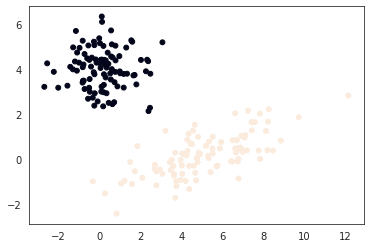

In [4]:
df = pd.read_csv("./data/bi_dimensional_n_bi_modal_data.csv", index_col=False)

df.sample(5).head(n=5)

fig = plt.figure()
plt.scatter(df['x'], df['y'], 24, c=df['label'])

### Initialization

,label,x,y
0,1,0.785224,5.027652
187,2,4.763983,0.027380
100,2,7.265309,2.133138
164,2,5.719814,-0.330721
95,1,-0.240989,3.758580


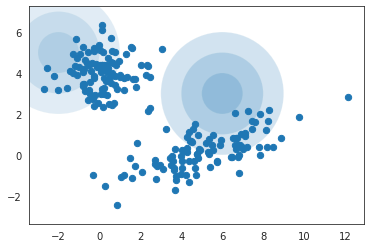

In [5]:
initial_guess = [{ 'mu': np.asarray([-2.0,5.0]),
          'Covar': np.asarray([ [1.0, 0], [0, 1.0] ]),
          'w': 0.4 },  
          {'mu': np.asarray([6.0,3.0]),
          'Covar': np.asarray([ [1.0, 0], [0, 1.0] ]),
          'w': 0.6}]

iters = 0
df_copy = df.copy()

df_copy.sample(5).head(5)

labels = df_copy.label
X = df[['x','y']].values
plot_gmm(initial_guess, X)

### Expectation

In [6]:
# Gaussian probability density function
def gaussian_prob(x, mu, covar):

    covar_inv = np.linalg.inv(covar)
    
    d = mu.shape[0]
    det_covar = np.linalg.det(covar)
    norm_const = 1.0/np.sqrt(np.power(2*np.pi,d))/det_covar
  
    a = x - mu
    a_times_covar_inv = np.matmul(a, covar_inv)

    p = norm_const* np.exp(-0.5* np.matmul(a_times_covar_inv,a.transpose()))
    
    return p

# assign every data point to its most likely cluster
def expectation(dataFrame, gmm):
    
    
    param = gmm[0]  
    mu1 = param['mu']
    covar1 = param['Covar']
    w1 = param['w']
    
    param = gmm[1]  
    mu2 = param['mu']
    covar2 = param['Covar']
    w2 = param['w']

    for i in range(dataFrame.shape[0]):

        x = df[['x','y']].values[i]
     
        # probability that a point came from a Guassian with given parameters
        p_cluster1 = w1*gaussian_prob(x, mu1, covar1)
        p_cluster2 = w2*gaussian_prob(x, mu2, covar2)


        if p_cluster1 > p_cluster2:
            dataFrame['label'][i] = 1
        else:
            dataFrame['label'][i] = 2
            
    return dataFrame

## First iteration

In [7]:
%%time
iters += 1

# E-step
updated_labels = expectation(df_copy, initial_guess)

CPU times: user 130 ms, sys: 8.92 ms, total: 139 ms
Wall time: 170 ms


,label,x,y
111,2,5.204878,0.580978
167,2,8.267473,2.204552
166,2,2.711545,-0.264893
52,1,-1.086716,4.721620
73,1,-1.423410,4.088966


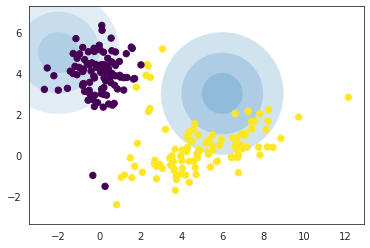

In [8]:
updated_labels.sample(5).head(5)

labels = updated_labels.label

X = df[['x','y']].values
plot_gmm(initial_guess, X, label=labels)

###  Maximization

In [9]:
# update estimates of lambda, mu and sigma
def maximization(dataFrame, gmm):
    
    points_assigned_to_cluster1 = dataFrame[dataFrame['label'] == 1]
    points_assigned_to_cluster2 = dataFrame[dataFrame['label'] == 2]
    
    percent_assigned_to_cluster1 = len(points_assigned_to_cluster1) / float(len(dataFrame))
    percent_assigned_to_cluster2 = 1 - percent_assigned_to_cluster1
    
    X1 = points_assigned_to_cluster1[['x','y']].values
    mu1 = np.mean(X1,axis=0)
    covar1 = np.cov(X1.transpose())
    
    X2 = points_assigned_to_cluster2[['x','y']].values
    mu2 = np.mean(X2,axis=0)
    covar2 = np.cov(X2.transpose())
   

    gmm = [{ 'mu': mu1,
          'Covar': covar1,
          'w': percent_assigned_to_cluster1},  
          {'mu': mu2,
          'Covar': covar2,
          'w': percent_assigned_to_cluster2}]
    
    return gmm

# get the distance between points
def distance(old_params, new_params):

    dist = 0
    
    dmu1 = np.linalg.norm(new_params[0]['mu'] - old_params[0]['mu'])
    dmu2 = np.linalg.norm(new_params[1]['mu'] - old_params[1]['mu'])
    
    return [dmu1,dmu2]

In [10]:
%%time

# M-step
new_gmm = maximization(updated_labels, initial_guess)

# see if our estimates of mu have changed
mu_shift = distance(initial_guess, new_gmm)

CPU times: user 0 ns, sys: 6.76 ms, total: 6.76 ms
Wall time: 6.08 ms


New gmm: [{'mu': array([-0.03664249,  3.92240438]), 'Covar': array([[0.83120001, 0.03521156],
       [0.03521156, 1.33671694]]), 'w': 0.47}, {'mu': array([4.98578426, 0.46797474]), 'Covar': array([[4.48775416, 0.53599296],
       [0.53599296, 1.71047629]]), 'w': 0.53}]
mu_shift:[2.2396394832597712, 2.7275970215386933]


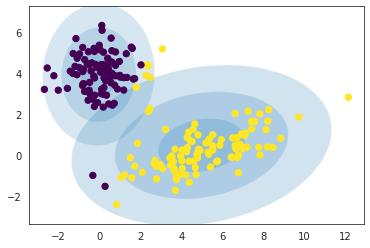

In [11]:
print('New gmm: {}'.format(new_gmm))
print('mu_shift:{}'.format(mu_shift))

plot_gmm(new_gmm, X, label=labels)

## 2nd Iteration

In [12]:
%%time
iters += 1

# E-step
updated_labels = expectation(df_copy, new_gmm)

# M-step
prv_gmm = new_gmm.copy()
new_gmm = maximization(updated_labels, prv_gmm)

# see if our estimates of mu have changed
mu_shift = distance(prv_gmm, new_gmm)

CPU times: user 51.8 ms, sys: 137 ms, total: 189 ms
Wall time: 176 ms


New gmm: [{'mu': array([0.11182166, 4.042304  ]), 'Covar': array([[1.14667221, 0.06535323],
       [0.06535323, 0.73443212]]), 'w': 0.49}, {'mu': array([5.04010014, 0.21730923]), 'Covar': array([[4.75322741, 1.29714424],
       [1.29714424, 0.94994442]]), 'w': 0.51}]
mu_shift:[0.19083375960460114, 0.2564827667884491]


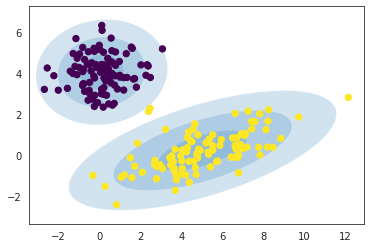

In [13]:
print('New gmm: {}'.format(new_gmm))
print('mu_shift:{}'.format(mu_shift))

plot_gmm(new_gmm, X, label=labels)

## How to choose the number of Gaussians

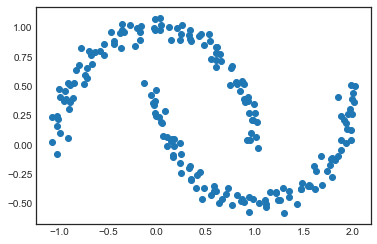

In [19]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
fig = plt.figure()
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

In [20]:
def plot_scikit_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

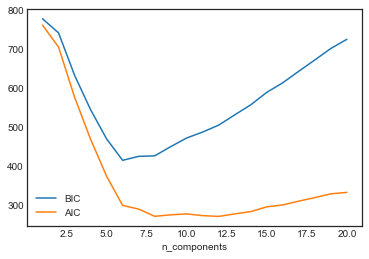

In [24]:
from sklearn.mixture import GMM

n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');


As can be seen in the graph, there is no much gain to use more than 5 gaussians.

See the cluster for the cases: 2, 6 and 12 Gaussians.

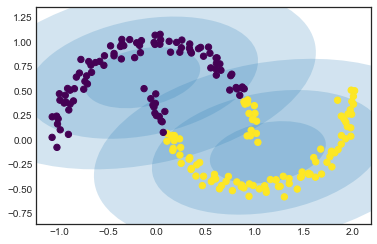

In [25]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_scikit_gmm(gmm2, Xmoon)

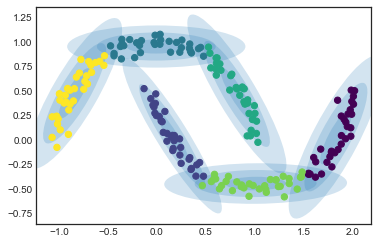

In [26]:
gmm6 = GMM(n_components=6, covariance_type='full', random_state=0)
plot_scikit_gmm(gmm6, Xmoon)

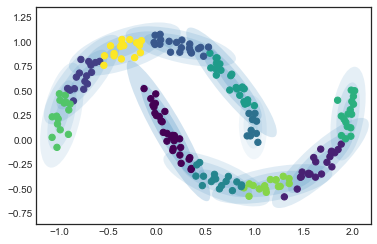

In [27]:
gmm12 = GMM(n_components=12, covariance_type='full', random_state=0)
plot_scikit_gmm(gmm12, Xmoon)

Summary
----

- Gaussian Mixture Models (GMM) take our old friend the Gaussian and add another Gaussian(s).
- This allows us to model more complex data.
- We fit a GMM with the Expectation–Maximization (EM) Algorithm.
- Expectation–Maximization (EM) Algorithm is a series of steps to find good parameter estimates
- EM can be used beyond GMM
- GMM work well but you have to guess the number of Gaussians. Kernel Density Estimation (KDE) does __not__ require that kind of guessing 

<br>
<br> 
<br>

----